In [2]:
import numpy as np
import pandas as pd

In [3]:
df_train = pd.read_csv('C:/Users/Ax/Desktop/chars/train.csv', encoding='utf-8')
df_train['id'] = df_train['id'].apply(str)

In [4]:
df_test = pd.read_csv('C:/Users/Ax/Desktop/chars/test.csv', encoding='utf-8')
df_test['test_id'] = df_test['test_id'].apply(str)

In [5]:
df_all = pd.concat((df_train, df_test))
df_all['question1'].fillna('', inplace=True)
df_all['question2'].fillna('', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import itertools

In [7]:
counts_vectorizer = CountVectorizer(max_features=10000-1).fit(
    itertools.chain(df_all['question1'], df_all['question2']))
other_index = len(counts_vectorizer.vocabulary_)

In [8]:
counts_vectorizer.vocabulary_

{'l2218': 1965,
 'l2568': 2272,
 'l0360': 322,
 'l0242': 216,
 'l0741': 653,
 'l2376': 2103,
 'l2168': 1922,
 'l0050': 45,
 'l1187': 1049,
 'l0104': 93,
 'l2432': 2150,
 'l0902': 798,
 'l0143': 127,
 'l2582': 2284,
 'l0362': 324,
 'l2323': 2055,
 'l1526': 1349,
 'l2214': 1961,
 'l1132': 998,
 'l2723': 2402,
 'l1861': 1649,
 'l2249': 1991,
 'l0507': 448,
 'l2293': 2029,
 'l2927': 2583,
 'l0018': 17,
 'l2321': 2053,
 'l1346': 1189,
 'l1149': 1013,
 'l1980': 1752,
 'l1872': 1659,
 'l1236': 1093,
 'l0260': 233,
 'l3019': 2667,
 'l0693': 608,
 'l0363': 325,
 'l2271': 2009,
 'l1389': 1229,
 'l2932': 2588,
 'l0466': 413,
 'l1971': 1744,
 'l2669': 2356,
 'l0024': 23,
 'l1331': 1177,
 'l0016': 15,
 'l2414': 2134,
 'l1061': 935,
 'l0633': 559,
 'l0578': 509,
 'l2077': 1840,
 'l2592': 2294,
 'l1742': 1543,
 'l1715': 1519,
 'l2292': 2028,
 'l0158': 142,
 'l2462': 2178,
 'l1368': 1210,
 'l1128': 995,
 'l2888': 2549,
 'l2863': 2527,
 'l1497': 1323,
 'l0656': 575,
 'l1667': 1476,
 'l2807': 2477,
 'l2

In [9]:
vocab_size=other_index+1

In [10]:
import re
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
words_tokenizer = re.compile(counts_vectorizer.token_pattern)

In [12]:
def create_padded_seqs(texts, max_len=20):
    seqs = texts.apply(lambda s: 
        [counts_vectorizer.vocabulary_[w] if w in counts_vectorizer.vocabulary_ else other_index
         for w in words_tokenizer.findall(s.lower())])
    return pad_sequences(seqs, maxlen=max_len)

In [13]:
#df_all = df_all.sample(1000) # Just for debugging

In [16]:
X1_train, X1_val, X2_train, X2_val, y_train, y_val = \
    train_test_split(create_padded_seqs(df_all[df_all['id'].notnull()]['question1']), 
                     create_padded_seqs(df_all[df_all['id'].notnull()]['question2']),
                     df_all[df_all['id'].notnull()]['is_duplicate'].values,
                     stratify=df_all[df_all['id'].notnull()]['is_duplicate'].values,
                     test_size=0.1, random_state=1989)

In [17]:
X1_train.shape

(228947, 20)

In [18]:
X2_train.shape

(228947, 20)

In [104]:
file=open("char_embed - 副本.txt")
lines=file.readlines()
rows=len(lines)
 
datamat = np.zeros((rows,300))
 
row=0
for line in lines:
    line=line.strip().split(' ')
    datamat[row,:]=line[1::]
    row+=1
 
print(datamat)
print(datamat.shape)

[[-0.54645991  2.2850914  -3.0843091  ... -0.5284521  -0.34052843
  -2.01874685]
 [-9.01635551 -3.80108356 -7.210567   ... -2.65304875  1.86873138
   2.14706421]
 [-0.13882397  0.21914813 -0.89005274 ... -0.57967824 -0.32235387
  -0.66130197]
 ...
 [-1.63232911 -0.24604906  0.21140376 ... -1.26453495  3.35999775
   0.23747765]
 [ 1.64362943 -5.37535715  5.10295582 ... -4.8079195  -0.36651626
   2.18456984]
 [ 1.53302073 -0.89149183  0.77164912 ... -2.44610071  5.59940767
  -2.09930205]]
(3048, 300)


In [24]:
# load the whole embedding into memory
from numpy import array
from numpy import asarray
from numpy import zeros
embeddings_index = dict()
f = open('char_embed.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 3048 word vectors.


In [85]:
import gensim
from gensim import models
from gensim.models import Word2Vec, KeyedVectors
from mxnet import nd
from mxnet.contrib import text
from mxnet.gluon import nn
new_model = Word2Vec.load('char_embed - 副本.bin')

ValueError: invalid literal for int() with base 0: '000 -0.54645991 2.28509140 -3.08430910 1.06466067 -2.09087992 0.65149629 -2.42987657 -2.26238489 -1.98188436 0.38887727 -0.60196298 2.06874442 1.40209007 1.50007081 -0.52701718 -0.45332417 2.17562485

In [25]:
embeddings_index

{'L0000': array([-5.4645991e-01,  2.2850914e+00, -3.0843091e+00,  1.0646607e+00,
        -2.0908799e+00,  6.5149629e-01, -2.4298766e+00, -2.2623849e+00,
        -1.9818844e+00,  3.8887727e-01, -6.0196298e-01,  2.0687444e+00,
         1.4020901e+00,  1.5000708e+00, -5.2701718e-01, -4.5332417e-01,
         2.1756248e+00, -5.8758962e-01,  2.3699950e-01,  1.7127999e+00,
         6.9448650e-01,  1.2974085e+00, -8.9826810e-01, -5.1567364e-01,
         2.5099576e+00, -1.9133916e+00,  3.6315680e-02,  3.0979641e-02,
         5.9069630e-02, -9.8675585e-01,  2.8371689e-01,  1.1030021e+00,
         3.6754587e+00,  2.3497686e+00,  1.0153168e+00, -4.2575815e-01,
        -3.3796784e-01, -2.7783522e-01,  3.9562294e-01,  5.2547210e-01,
         3.9594643e+00,  1.4170251e+00,  1.6074953e+00,  2.0548680e-01,
         1.2273343e+00,  1.9452659e-02, -6.7003083e-01, -3.9959738e-01,
         2.5185068e+00, -3.1569247e+00,  4.0359351e-01, -1.2148958e+00,
         1.7214912e+00,  1.5321470e+00, -5.4094654e-01,

In [26]:
counts_vectorizer.vocabulary_.items()

dict_items([('l2218', 1965), ('l2568', 2272), ('l0360', 322), ('l0242', 216), ('l0741', 653), ('l2376', 2103), ('l2168', 1922), ('l0050', 45), ('l1187', 1049), ('l0104', 93), ('l2432', 2150), ('l0902', 798), ('l0143', 127), ('l2582', 2284), ('l0362', 324), ('l2323', 2055), ('l1526', 1349), ('l2214', 1961), ('l1132', 998), ('l2723', 2402), ('l1861', 1649), ('l2249', 1991), ('l0507', 448), ('l2293', 2029), ('l2927', 2583), ('l0018', 17), ('l2321', 2053), ('l1346', 1189), ('l1149', 1013), ('l1980', 1752), ('l1872', 1659), ('l1236', 1093), ('l0260', 233), ('l3019', 2667), ('l0693', 608), ('l0363', 325), ('l2271', 2009), ('l1389', 1229), ('l2932', 2588), ('l0466', 413), ('l1971', 1744), ('l2669', 2356), ('l0024', 23), ('l1331', 1177), ('l0016', 15), ('l2414', 2134), ('l1061', 935), ('l0633', 559), ('l0578', 509), ('l2077', 1840), ('l2592', 2294), ('l1742', 1543), ('l1715', 1519), ('l2292', 2028), ('l0158', 142), ('l2462', 2178), ('l1368', 1210), ('l1128', 995), ('l2888', 2549), ('l2863', 25

In [31]:
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 300))
for word, i in counts_vectorizer.vocabulary_.items():
	embedding_vector = embeddings_index.get(word.capitalize())
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [32]:
embedding_matrix[5]

array([ 3.05966449e+00, -1.57049823e+00, -6.29994154e-01,  1.99017298e+00,
        4.33813483e-01, -9.62802649e-01,  4.28381348e+00,  4.13791132e+00,
        4.07579422e+00,  2.95941758e+00, -1.94185436e+00, -7.06070662e-01,
       -3.27134466e+00, -4.91400480e-01,  3.52235436e+00,  1.36313188e+00,
       -2.33803225e+00,  2.79753476e-01, -5.17471194e-01, -3.06606197e+00,
        2.16477418e+00, -2.84646225e+00, -4.84284306e+00, -3.63764811e+00,
       -6.25823319e-01, -5.52740932e-01, -3.25873286e-01, -1.22320580e+00,
        2.35891581e+00,  2.81525040e+00, -6.30387163e+00,  3.36901426e+00,
       -6.68798387e-01,  3.76955485e+00, -5.24330616e+00,  4.82257557e+00,
       -7.27987230e-01, -4.50099564e+00, -2.09163618e+00,  4.57763612e-01,
        1.19995140e-01, -3.02959943e+00, -2.26319075e+00,  2.15600109e+00,
       -1.76356006e+00,  1.91071761e+00, -1.20118594e+00, -6.57173812e-01,
       -4.83382273e+00,  3.79242420e+00, -5.71566522e-01, -1.77654004e+00,
        1.77730238e+00,  

In [33]:
import keras.layers as lyr
from keras.models import Model

In [34]:
input1_tensor = lyr.Input(X1_train.shape[1:])
input2_tensor = lyr.Input(X2_train.shape[1:])
input1_tensor.shape

TensorShape([Dimension(None), Dimension(20)])

In [53]:
X1_train.shape

(228947, 20)

In [42]:
X1_train.max()

2694

In [39]:
input1_tensor = lyr.Input(X1_train.shape[1:])
input2_tensor = lyr.Input(X2_train.shape[1:])

#words_embedding_layer = lyr.Embedding(X1_train.max() + 1, 300)
words_embedding_layer = lyr.Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)
seq_embedding_layer = lyr.LSTM(256, activation='tanh')

seq_embedding = lambda tensor: seq_embedding_layer(words_embedding_layer(tensor))

merge_layer = lyr.multiply([seq_embedding(input1_tensor), seq_embedding(input2_tensor)])

dense1_layer = lyr.Dense(32, activation='sigmoid')(merge_layer)
ouput_layer = lyr.Dense(1, activation='sigmoid')(dense1_layer)

model = Model([input1_tensor, input2_tensor], ouput_layer)
#modi
#e = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)
#model.add(e)
#modi
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 20)           0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 20)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 20, 300)      808800      input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 256)          570368      embedding_2[0][0]                
          

In [38]:
seq_embedding(input1_tensor)

<tf.Tensor 'lstm_1_2/TensorArrayReadV3:0' shape=(?, 256) dtype=float32>

In [31]:
model.fit([X1_train, X2_train], y_train, 
          validation_data=([X1_val, X2_val], y_val), 
          batch_size=64, epochs=10, verbose=2)

Train on 228946 samples, validate on 25439 samples
Epoch 1/10
 - 91s - loss: 0.4279 - val_loss: 0.3302
Epoch 2/10


KeyboardInterrupt: 

In [44]:
features_model = Model([input1_tensor, input2_tensor], merge_layer)
features_model.compile(loss='mse', optimizer='adam')

In [45]:
F_train = features_model.predict([X1_train, X2_train], batch_size=64)
F_val = features_model.predict([X1_val, X2_val], batch_size=64)

In [55]:
F_train.shape

(228947, 256)

In [35]:
import xgboost as xgb

In [36]:
dTrain = xgb.DMatrix(F_train, label=y_train)
dVal = xgb.DMatrix(F_val, label=y_val)

In [45]:
xgb_params = {
    'objective': 'binary:logistic',
    'booster': 'gbtree',
    'eval_metric': 'logloss',
    'eta': 0.1, 
    'max_depth': 9,
    'subsample': 0.9,
    'colsample_bytree': 1 / F_train.shape[1]**0.5,
    'min_child_weight': 5,
    'silent': 1
}
bst = xgb.train(xgb_params, dTrain, 1000,  [(dTrain,'train'), (dVal,'val')], 
                verbose_eval=10, early_stopping_rounds=10)

[0]	train-logloss:0.660504	val-logloss:0.662923
Multiple eval metrics have been passed: 'val-logloss' will be used for early stopping.

Will train until val-logloss hasn't improved in 10 rounds.
[10]	train-logloss:0.43992	val-logloss:0.467727
[20]	train-logloss:0.327839	val-logloss:0.37369
[30]	train-logloss:0.264958	val-logloss:0.324712
[40]	train-logloss:0.220948	val-logloss:0.293513
[50]	train-logloss:0.187915	val-logloss:0.271873
[60]	train-logloss:0.162466	val-logloss:0.256672
[70]	train-logloss:0.144503	val-logloss:0.247411
[80]	train-logloss:0.129654	val-logloss:0.240586
[90]	train-logloss:0.117203	val-logloss:0.23526
[100]	train-logloss:0.106697	val-logloss:0.231831
[110]	train-logloss:0.097804	val-logloss:0.229468
[120]	train-logloss:0.090606	val-logloss:0.228007
[130]	train-logloss:0.083734	val-logloss:0.226698
[140]	train-logloss:0.077725	val-logloss:0.226177
[150]	train-logloss:0.072251	val-logloss:0.225875
[160]	train-logloss:0.067387	val-logloss:0.225909
Stopping. Best it

In [46]:
X1_test = create_padded_seqs(df_all[df_all['test_id'].notnull()]['question1'])
X2_test = create_padded_seqs(df_all[df_all['test_id'].notnull()]['question2'])

In [47]:
F_test = features_model.predict([X1_test, X2_test], batch_size=64)

In [48]:
dTest = xgb.DMatrix(F_test)

In [49]:
df_sub = pd.DataFrame({
        'test_id': df_all[df_all['test_id'].notnull()]['test_id'].values,
        'y_pre': bst.predict(dTest, ntree_limit=bst.best_ntree_limit)
    }).set_index('test_id')

In [50]:
df_sub.head()

y_pre
test_id          
0        0.054278
1        0.978075
2        0.240083
3        0.998168
4        0.539208

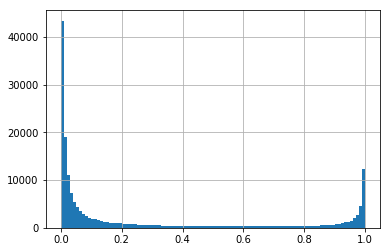

In [51]:
df_sub['y_pre'].hist(bins=100)

In [52]:
df_sub.to_csv('submission20180624LSTM_06.csv', index=False)